In [4]:
pip install tensorflow-gpu

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\inven\AppData\Local\Temp\pip-install-eih51yjk\tensorflow-gpu_f1a0fa5b43ec4fb5bee16521d425bcef\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not

In [1]:
#installing dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#to visualize an image
plt.imshow??

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf


In [4]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [6]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [5]:
#collecting datasets from labeled datasets in the wild 
# http://vis-www.cs.umass.edu/lfw/
# Move dataset Images to the following repository data/negative
for directory in os.listdir('dataset'):#looping though every single folder
    for file in os.listdir(os.path.join('dataset', directory)):#looping through each file in each folder
        EX_PATH = os.path.join('dataset', directory, file)# define existing path
        NEW_PATH = os.path.join(NEG_PATH, file)#specify new path for negative
        os.replace(EX_PATH, NEW_PATH)# pass existing path to a new path

In [6]:
os.listdir('dataset')

['aishwarya_rai',
 'angelina_jolie',
 'arnold_schwarzenegger',
 'bhuvan_bam',
 'brad_pitt',
 'bruno_Oyuko',
 'Courteney_Cox',
 'David_Schwimmer',
 'dhoni',
 'hardik_pandya',
 'Jennifer_Aniston',
 'Jim_Parsons',
 'Johnny_Galeck',
 'Joseph_0696',
 'kerubo_Monicah',
 'Kunal_Nayya',
 'Lisa_Kudrow',
 'manoj_bajpayee',
 'Matthew_Perry',
 'Matt_LeBlanc',
 'messi',
 'mohamed_ali',
 'Pankaj_Tripathi',
 'pewdiepie',
 'random_person',
 'ROHIT_SHARMA',
 'ronaldo',
 'Sachin_Tendulka',
 'scarlett_johansson',
 'Simon_Helberg',
 'suresh_raina',
 'sylvester_stallone',
 'virat_kohli']

In [7]:
# Importing uuid library to generate unique image names
import uuid

In [8]:
#storing images inside the anchor folder
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\4856e8dc-82b1-11ee-8536-0090a2cf62d8.jpg'

In [9]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+350,200:200+350, :]#specifying the range of values we want from an image
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

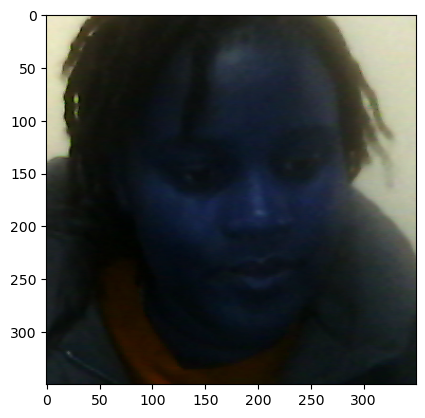

In [10]:
plt.imshow(frame)

In [11]:
frame.shape

(350, 350, 3)

In [12]:
#data augmentation
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
        data.append(img)
    
    return data

In [13]:
#getting image directories
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(200)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(200)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(200)

In [14]:
dir_test = anchor.as_numpy_iterator()


In [15]:
print(dir_test.next())

b'data\\anchor\\772a5d8b-7e28-11ee-aeb4-0090a2cf62d8.jpg'


In [16]:
#preprocessing, scaling and resizing
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [17]:
img = preprocess('data\\anchor\\5aca9866-7e26-11ee-be5c-0090a2cf62d8.jpg')

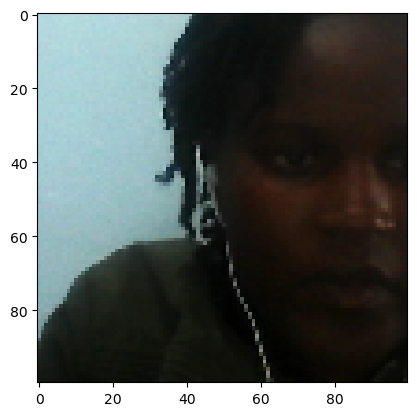

In [18]:
plt.imshow(img)

In [19]:
img.numpy().min() 

0.0

In [20]:
tf.zeros(len(anchor))

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [21]:
tf.ones(len(anchor))

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [22]:
class_labels=tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))

In [23]:
iterator_labs=class_labels.as_numpy_iterator()

In [24]:
#looping though the labels
iterator_labs.next()

0.0

In [25]:
#create labeled dataset
#labels to take a positive and negative class
#(anchor, positive)=>1,1,1,1,1
#(anchor, negative)=>0,0,0,0,0
#these are different directories  for labeled positives 1 for positive recognition and 0 for negative/unindetification
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)


In [26]:
samples=data.as_numpy_iterator()

In [27]:
example=samples.next()

In [28]:
#Build train and test partition

def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [29]:
res = preprocess_twin(*example)

In [30]:
example

(b'data\\anchor\\8a62fd20-7e28-11ee-842b-0090a2cf62d8.jpg',
 b'data\\positive\\3fe9a8c8-7e26-11ee-8057-0090a2cf62d8 - Copy.jpg',
 1.0)

In [31]:
res
#ist to the preprocessed image

(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[0.64509803, 0.76740193, 0.77818626],
         [0.65367645, 0.76936275, 0.7830882 ],
         [0.6507353 , 0.76642156, 0.7801471 ],
         ...,
         [0.6134804 , 0.7352941 , 0.7252451 ],
         [0.6252451 , 0.74191177, 0.73406863],
         [0.6281863 , 0.74485296, 0.7370098 ]],
 
        [[0.64485294, 0.7882353 , 0.76642156],
         [0.6428922 , 0.78406864, 0.76887256],
         [0.64240193, 0.78210783, 0.76911765],
         ...,
         [0.6127451 , 0.7377451 , 0.7262255 ],
         [0.6161765 , 0.73970586, 0.7289216 ],
         [0.6129902 , 0.7321078 , 0.7235294 ]],
 
        [[0.6404412 , 0.7776961 , 0.7504902 ],
         [0.6367647 , 0.7740196 , 0.747549  ],
         [0.6404412 , 0.7776961 , 0.75416666],
         ...,
         [0.62941176, 0.74607843, 0.7382353 ],
         [0.5995098 , 0.71617645, 0.7083333 ],
         [0.6134804 , 0.7257353 , 0.71862745]],
 
        ...,
 
        [[0.04313726, 0.05098039

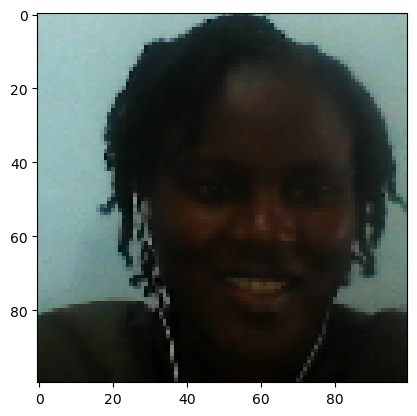

In [32]:
plt.imshow(res[1])

In [33]:
#building a data loader pipeline
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [34]:
samples=data.as_numpy_iterator()

In [35]:
samples.next()

(array([[[0.6879902 , 0.8125    , 0.8232843 ],
         [0.68357843, 0.8154412 , 0.8240196 ],
         [0.6901961 , 0.81715685, 0.8272059 ],
         ...,
         [0.10098039, 0.14019608, 0.1382353 ],
         [0.10808823, 0.14730392, 0.15220588],
         [0.11568628, 0.15490197, 0.1627451 ]],
 
        [[0.67132354, 0.80857843, 0.81642157],
         [0.6693627 , 0.8066176 , 0.8144608 ],
         [0.6639706 , 0.8129902 , 0.8247549 ],
         ...,
         [0.09117647, 0.13039216, 0.13431373],
         [0.09117647, 0.13039216, 0.1382353 ],
         [0.10588235, 0.14803922, 0.15588236]],
 
        [[0.6848039 , 0.8159314 , 0.8245098 ],
         [0.68602943, 0.8215686 , 0.82941175],
         [0.6781863 , 0.81764704, 0.83259803],
         ...,
         [0.09901961, 0.13431373, 0.12254902],
         [0.10416666, 0.14093137, 0.12843138],
         [0.09803922, 0.14338236, 0.13210784]],
 
        ...,
 
        [[0.07058824, 0.08235294, 0.05490196],
         [0.0627451 , 0.07450981, 0.04705

In [36]:
#negative image
samp=samples.next()

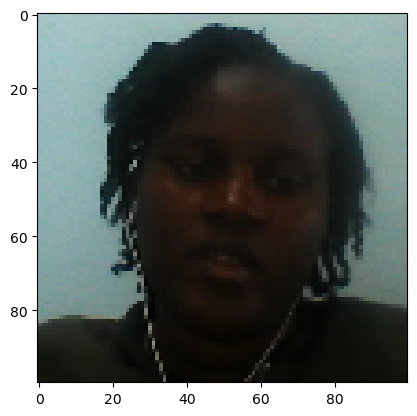

In [37]:
plt.imshow(samp[0])

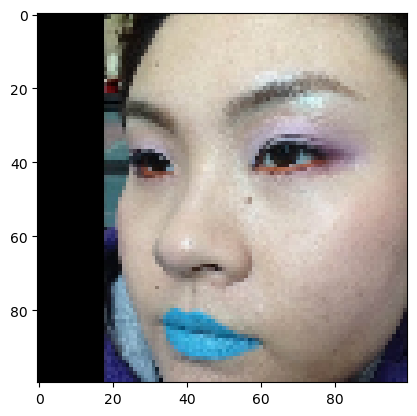

In [40]:
plt.imshow(samp[1])

In [38]:
samp[2]

1.0

In [39]:
round(len(data)*.7)

239

In [40]:
round(len(data)*.3)

102

In [41]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [42]:
train_samples=train_data.as_numpy_iterator()

In [43]:
#testing partiotion
test_data=data.skip(round(len(data)*.7))
test_data=test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)


In [44]:
inp = Input(shape=(100,100,3), name='input_image')

In [45]:
#CONVOLUTIONAL LAYER
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [46]:
c1

<KerasTensor: shape=(None, 91, 91, 64) dtype=float32 (created by layer 'conv2d')>

In [47]:
#MAXPOOLING LAYER
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [48]:
m1

<KerasTensor: shape=(None, 46, 46, 64) dtype=float32 (created by layer 'max_pooling2d')>

In [49]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [50]:
c2


<KerasTensor: shape=(None, 40, 40, 128) dtype=float32 (created by layer 'conv2d_1')>

In [51]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [52]:
c3

<KerasTensor: shape=(None, 17, 17, 128) dtype=float32 (created by layer 'conv2d_2')>

c2 

In [53]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [54]:
c4

<KerasTensor: shape=(None, 6, 6, 256) dtype=float32 (created by layer 'conv2d_3')>

In [55]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [56]:
mod

mod

In [57]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [58]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

mod

In [59]:
#BUILDING A SIAMESE NEURAL NETWORK
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [60]:
embedding=make_embedding()

In [61]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 17, 128)       26

In [64]:
#BUILDING A DISTANCE LAYER 

In [66]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    #working with specific layers
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [63]:
l1 = L1Dist()

In [64]:
l1

In [65]:
l1(anchor_embedding, validation_embedding)


NameError: name 'anchor_embedding' is not defined

In [67]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [68]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [69]:
inp_embedding

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [70]:
embedding(input_image)

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [71]:
siamese_layer = L1Dist()#will take 2 inputs (inp_embedding and val_embedding)

In [72]:
distances=siamese_layer(inp_embedding, val_embedding)

In [73]:
classifier = Dense(1, activation='sigmoid')(distances)

In [74]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [75]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name="Siamese Network")

In [76]:
siamese_network.summary()

Model: "Siamese Network"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                    

In [77]:
#MAKING SIAMESE MODEL
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [78]:
siamese_model = make_siamese_model()


In [79]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [80]:
#TRAINING
#SET UP LOSS AND OPTIMIZER
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [81]:
#DEFINE AN OPTIMIZER
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [82]:
# Compile the model
siamese_model.compile(optimizer=opt, loss=binary_cross_loss, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [83]:
#ESTABLISH CHECKPOINTS
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [84]:
test_batch=train_data.as_numpy_iterator()

In [85]:
batch_1=test_batch.next()

In [86]:
X = batch_1[:2]

In [87]:
len(X)

2

In [88]:
np.array(X).shape

(2, 16, 100, 100, 3)

In [89]:
y = batch_1[2]

In [90]:
y

array([0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
      dtype=float32)

In [91]:
tf.losses.BinaryCrossentropy??

In [92]:
@tf.function
def train_step(batch):
    
    # Record all of the operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss
        


In [93]:
#build a training loop
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [94]:
import tensorflow as tf
from tensorflow.keras.metrics import Recall, Precision


In [95]:
#TRAIN THE MODEL
EPOCHS = 50

In [96]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
15/15 [==============================] - 933s 62s/step
0.17231014 0.60194176 1.0

 Epoch 2/50
15/15 [==============================] - 1236s 84s/step
0.11142962 0.9519231 1.0

 Epoch 3/50
15/15 [==============================] - 957s 62s/step
0.030748615 0.9514563 1.0

 Epoch 4/50


KeyboardInterrupt: 

In [ ]:
#EVALUATE THE MODEL

In [97]:
#import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [98]:
#grabing a batch of test data to make predictions
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [99]:
test_data.as_numpy_iterator()# looping through and dynamically producing one batch of data

In [100]:
test_var=test_data.as_numpy_iterator().next()

In [101]:
len(test_var) # variables

3

In [102]:
test_var[2]

array([0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

In [103]:
#making predictions
y_hat=siamese_model.predict([test_input,test_val])
y_hat

1/1 [==============================] - 6s 6s/step


array([[7.1246373e-05],
       [9.9840730e-01],
       [7.3356945e-03],
       [9.8596972e-01],
       [8.9154047e-01],
       [4.6509253e-03],
       [9.9640667e-01],
       [1.2665550e-05],
       [5.1056576e-01],
       [2.3233784e-05],
       [5.6998119e-02],
       [9.9921113e-01],
       [9.9732316e-01],
       [2.4025570e-05],
       [8.0856109e-01],
       [9.9405527e-01]], dtype=float32)

In [104]:
#post_processing the results
[1 if prediction > 0.5 else 0 for prediction in y_hat ]#threshold is 0.5


[0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1]

In [105]:
res=[]
for prediction in y_hat:
    if prediction > 0.5:
        res.append(1)
    else:
        res.append(0)


In [106]:
y_true

array([0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

In [107]:
#creating a metric object for recall
m=Recall()
#CALCULATING THE RECALL VALUE
m.update_state(y_true, y_hat)
#return value
m.result().numpy()

1.0

In [108]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

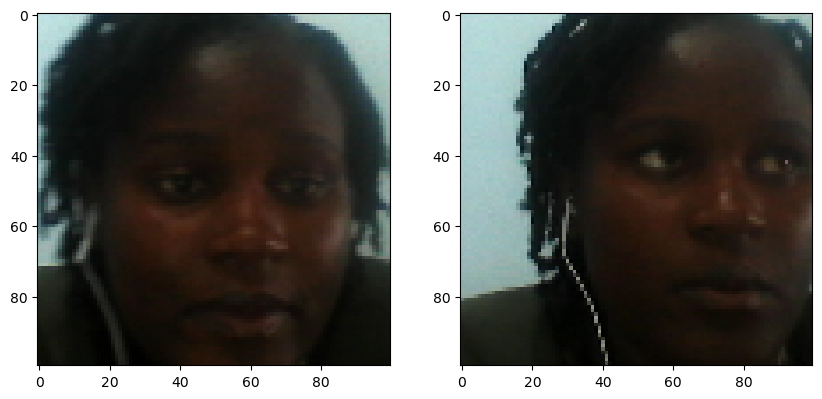

In [109]:
#VISUALIZE RESULTS
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[1])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[1])

# Renders cleanly
plt.show()

In [110]:
#SAVE MY MODEL
# Save weights
siamese_model.save('siamesemodel.h5')

C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [111]:
l1=L1Dist

In [112]:
# Reload model 
model = tf.keras.models.load_model('siamesemodel.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})


In [113]:
tf.keras.models.load_model??

In [114]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

1/1 [==============================] - 6s 6s/step


array([[7.1246373e-05],
       [9.9840730e-01],
       [7.3356945e-03],
       [9.8596972e-01],
       [8.9154047e-01],
       [4.6509253e-03],
       [9.9640667e-01],
       [1.2665550e-05],
       [5.1056576e-01],
       [2.3233784e-05],
       [5.6998119e-02],
       [9.9921113e-01],
       [9.9732316e-01],
       [2.4025570e-05],
       [8.0856109e-01],
       [9.9405527e-01]], dtype=float32)

In [115]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

Real time Test

VERIFICATION FUNCTION

OPENCV REALTIME VERIFICATION

In [307]:
Verification\verification_images

SyntaxError: unexpected character after line continuation character (710448216.py, line 1)

In [118]:
os.listdir(os.path.join('Verification', 'verification_images'))

['3c597edb-7e26-11ee-b042-0090a2cf62d8 - Copy (2).jpg',
 '3c597edb-7e26-11ee-b042-0090a2cf62d8 - Copy - Copy.jpg',
 '3d6db525-7e26-11ee-bc99-0090a2cf62d8 - Copy.jpg',
 '3d95e699-7e26-11ee-a97c-0090a2cf62d8 - Copy.jpg',
 '3e9a4426-7e26-11ee-9dab-0090a2cf62d8 - Copy.jpg',
 '3f05a06d-7e26-11ee-ba42-0090a2cf62d8 - Copy.jpg',
 '3fb0bc24-7e26-11ee-9500-0090a2cf62d8 - Copy.jpg',
 '3fe9a8c8-7e26-11ee-8057-0090a2cf62d8 - Copy.jpg',
 '4052c3f1-7e26-11ee-b869-0090a2cf62d8 - Copy.jpg',
 '408503c1-7e26-11ee-a526-0090a2cf62d8 - Copy.jpg',
 '4121c247-7e26-11ee-9106-0090a2cf62d8 - Copy.jpg',
 '507613d8-7e26-11ee-b626-0090a2cf62d8 - Copy.jpg',
 '509a16da-7e26-11ee-b233-0090a2cf62d8 - Copy.jpg',
 'a04a8fef-7e28-11ee-ab80-0090a2cf62d8 - Copy.jpg',
 'a0b36671-7e28-11ee-8144-0090a2cf62d8 - Copy.jpg',
 'a2e0c870-7e28-11ee-9cd4-0090a2cf62d8 - Copy.jpg',
 'a2fae049-7e28-11ee-9c2c-0090a2cf62d8 - Copy.jpg',
 'a4e1d8e4-7e28-11ee-a0d2-0090a2cf62d8 - Copy.jpg',
 'a4fef924-7e28-11ee-9c76-0090a2cf62d8 - Copy.jpg',
 

In [116]:
os.path.join('Verification', 'input_image', 'input_image.jpg')

'Verification\\input_image\\input_image.jpg'

In [117]:
for image in os.listdir(os.path.join('Verification', 'verification_images')):
    validation_img = os.path.join('Verification', 'verification_images', image)
    print(validation_img)

Verification\verification_images\3c597edb-7e26-11ee-b042-0090a2cf62d8 - Copy (2).jpg
Verification\verification_images\3c597edb-7e26-11ee-b042-0090a2cf62d8 - Copy - Copy.jpg
Verification\verification_images\3d6db525-7e26-11ee-bc99-0090a2cf62d8 - Copy.jpg
Verification\verification_images\3d95e699-7e26-11ee-a97c-0090a2cf62d8 - Copy.jpg
Verification\verification_images\3e9a4426-7e26-11ee-9dab-0090a2cf62d8 - Copy.jpg
Verification\verification_images\3f05a06d-7e26-11ee-ba42-0090a2cf62d8 - Copy.jpg
Verification\verification_images\3fb0bc24-7e26-11ee-9500-0090a2cf62d8 - Copy.jpg
Verification\verification_images\3fe9a8c8-7e26-11ee-8057-0090a2cf62d8 - Copy.jpg
Verification\verification_images\4052c3f1-7e26-11ee-b869-0090a2cf62d8 - Copy.jpg
Verification\verification_images\408503c1-7e26-11ee-a526-0090a2cf62d8 - Copy.jpg
Verification\verification_images\4121c247-7e26-11ee-9106-0090a2cf62d8 - Copy.jpg
Verification\verification_images\507613d8-7e26-11ee-b626-0090a2cf62d8 - Copy.jpg
Verification\veri

In [118]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('Verification', 'verification_images')):
        input_img = preprocess(os.path.join('Verification', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('verification', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('Verification', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

OPENCV REAL TIME VERIFICATION

KeyboardInterrupt: 

In [120]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+750,200:200+650, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to Verification/input_image folder 
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10
        
#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.9, 0.7)
        print("Verification Results:", results)
        print("Verification Outcome:", verified)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 1s 549ms/step
Verification Results: [array([[0.8222753]], dtype=float32), array([[0.8222753]], dtype=float32), array([[0.5005376]], dtype=float32), array([[0.6275869]], dtype=float32), array([[0.5733661]], dtype=float32), array([[0.9512191]], dtype=float32), array([[0.47971162]], dtype=float32), array([[0.50333697]], dtype=float32), array([[0.6090528]], dtype=float32), array([[0.574387]], dtype=float32), array([[0.53948194]], dtype=float32), array([[0.99652064]], dtype=float32), array([[0.9918714]], dtype=float32), array([[0.98424983]], dtype=float32), array([[0.95803803]], dtype=float32), array([[0.97602004]], dtype=float32), array([[0.9663868]], dtype=float32), array([[0.79966223]], dtype=float32), array([[0.64833343]], dtype=float32), array([[0.90258986]], dtype=float32), array([[0.9945872]], dtype=float32), array([[0.9913952]], dtype=float32), array([[0.9017605]], dtype=float32), array([[0.9820037]], dtype=float32), array([[0.9760117]], dtype=

In [121]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [312]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [122]:
np.squeeze(results) > 0.6

array([ True,  True, False,  True, False,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [312]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [312]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [312]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [123]:
np.sum(np.squeeze(results)>0.5)

51

In [338]:
results

[array([[0.75339675]], dtype=float32),
 array([[0.75339675]], dtype=float32),
 array([[0.50086355]], dtype=float32),
 array([[0.6172973]], dtype=float32),
 array([[0.8417058]], dtype=float32),
 array([[0.9748161]], dtype=float32),
 array([[0.62185]], dtype=float32),
 array([[0.5173037]], dtype=float32),
 array([[0.44330707]], dtype=float32),
 array([[0.50185263]], dtype=float32),
 array([[0.5210996]], dtype=float32),
 array([[0.99963474]], dtype=float32),
 array([[0.9994864]], dtype=float32),
 array([[0.9998589]], dtype=float32),
 array([[0.99941874]], dtype=float32),
 array([[0.99966013]], dtype=float32),
 array([[0.9997582]], dtype=float32),
 array([[0.97926265]], dtype=float32),
 array([[0.96161586]], dtype=float32),
 array([[0.5896343]], dtype=float32),
 array([[0.9647324]], dtype=float32),
 array([[0.9196353]], dtype=float32),
 array([[0.06340576]], dtype=float32),
 array([[0.7935034]], dtype=float32),
 array([[0.9989703]], dtype=float32),
 array([[0.97452146]], dtype=float32),
 a